

```
# This is formatted as code
```



In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660336 sha256=3545aef3e5ec591150854dd3facf3cead697abb9e2ebca122e88da1e539cdd0b
  Stored in directory: /root/.cache/pip/wheels/d6/5d/cd/0752b58bc0a19cb9465c6db6e7a4e7c490c6f6cece8f8f6bcf
Successfully built en_core_sci_sm
  Attempting u

# **# Code base **is being changed due to access issues. save the file as a different name in your colab session- This should fix it

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import gzip
import shutil

#with gzip.open('/content/drive/MyDrive/NOTEEVENTS.csv.gz',"rb") as f_in:
#  with open('/content/drive/MyDrive/NOTEEVENTS.csv',"wb") as f_out:
#    shutil.copyfileobj(f_in,f_out)

dataset_path1 = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/NOTEEVENTS.csv'
#csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/NOTEEVENTS.csv'


In [ ]:
#with gzip.open('/content/drive/MyDrive/DIAGNOSES_ICD.csv.gz',"rb") as f_in:
#  with open('/content/drive/MyDrive/DIAGNOSES_ICD.csv',"wb") as f_out:
#    shutil.copyfileobj
dataset_path2 = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/DIAGNOSES_ICD.csv'

In [ ]:
import pandas as pd
df1 = pd.read_csv(dataset_path1)

df2 = pd.read_csv(dataset_path2)

In [ ]:
df1.shape

**bold text\**# **Filter the data in files to create a new relevant dataframe**

> Add blockquote



In [ ]:
df1.head()

In [ ]:
filtered_chartevents_df = df1[df1['text'].str.contains('cough', case=False)]
len(filtered_chartevents_df)

In [ ]:
filtered_chartevents_df.columns = map(str.lower, filtered_chartevents_df.columns)

In [ ]:
print('hadm_id' in df2.columns)
print('hadm_id' in filtered_chartevents_df.columns)

In [ ]:
filtered_chartevents_df.head()

In [ ]:
merged_df = pd.merge(df2, filtered_chartevents_df[['hadm_id', 'category', 'description','text']], on='hadm_id', how='inner')

merged_df = merged_df[merged_df['category'] == 'Nursing/other']

merged_df.head(10)


In [ ]:
# Select required columns, filter based on ICD9_CODE, and reset index for new_df
new_df = merged_df[['hadm_id', 'icd9_code', 'text']].reset_index(drop=True)

demo42731_df = new_df[new_df['icd9_code'] == '42731'].reset_index(drop=True)

In [ ]:
len(demo42731_df)

In [ ]:
print(demo42731_df)

# **Download the created datafram (whole or a part of it)**

In [ ]:
import spacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz
!pip install https://huggingface.co/kormilitzin/en_core_med7_trf/resolve/main/en_core_med7_trf-any-py3-none-any.whl --user
!pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl --user

In [ ]:
import spacy.cli
import en_ner_bc5cdr_md
from spacy import displacy

In [ ]:
# Load SpaCy model
nlp = spacy.load("en_ner_bc5cdr_md")

# Extract text from the first 10 rows of the 'TEXT' column
sample_texts = df1.loc[:9, 'text'].tolist()

# Process each text with the NER model

for text in sample_texts:
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)
    print(displacy.render(doc, style="ent", jupyter=True))


RegistryError: [E893] Could not find function 'spacy.Tagger.v2' in function registry 'architectures'. If you're using a custom function, make sure the code is available. If the function is provided by a third-party package, e.g. spacy-transformers, make sure the package is installed in your environment.

Available names: spacy-legacy.CharacterEmbed.v1, spacy-legacy.EntityLinker.v1, spacy-legacy.HashEmbedCNN.v1, spacy-legacy.MaxoutWindowEncoder.v1, spacy-legacy.MishWindowEncoder.v1, spacy-legacy.MultiHashEmbed.v1, spacy-legacy.Tagger.v1, spacy-legacy.TextCatBOW.v1, spacy-legacy.TextCatCNN.v1, spacy-legacy.TextCatEnsemble.v1, spacy-legacy.Tok2Vec.v1, spacy-legacy.TransitionBasedParser.v1, spacy.CharacterEmbed.v2, spacy.EntityLinker.v1, spacy.HashEmbedCNN.v2, spacy.MaxoutWindowEncoder.v2, spacy.MishWindowEncoder.v2, spacy.MultiHashEmbed.v2, spacy.PretrainCharacters.v1, spacy.PretrainVectors.v1, spacy.Tagger.v1, spacy.TextCatBOW.v1, spacy.TextCatCNN.v1, spacy.TextCatEnsemble.v2, spacy.TextCatLowData.v1, spacy.Tok2Vec.v2, spacy.Tok2VecListener.v1, spacy.TorchBiLSTMEncoder.v1, spacy.TransitionBasedParser.v1, spacy.TransitionBasedParser.v2

In [ ]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  print(doc[-1])
  print('*************************************************************************************************************')

[**2119-1-4**] 12:59 PM
 ABDOMEN U.S. (COMPLETE STUDY)                                   Clip # [**Clip Number (Radiology) 20829**]
 Reason: HEPATITIS ,ELAVATED LFT,S ,DISTENDED ABDOMEN ,EVAL FOR ASCITES ,LIVER MASS
 ______________________________________________________________________________
 [**Hospital 3**] MEDICAL CONDITION:
  47 year old man with
  HEPATITIS
 REASON FOR THIS EXAMINATION:
  RULE OUT ASCITES IF ASITES PRESENT TAP
 ______________________________________________________________________________
                                 FINAL REPORT
 INDICATION: Hepatitis ?ascites.

 FINDINGS:

 The liver is heterogeneous without focal abnormalities. There is no
 intrahepatic ductal dilatation. The portal vein is patent. There is no
 ascites. The spleen is enlarged and measures 14 cm. The visualized pancreas is
 unremarkable. Left kidney measures 13.9 cm in long axis. The right kidney
 measures 11.9 cm in long axis. There is no hydronephrosis, stones, or masses.

 IMPRESSION: 

In [ ]:
#named entitiesf
from spacy import displacy
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('*************************************************************************************************************')

Hepatitis 578 587 DISEASE
ascites 589 596 DISEASE
focal abnormalities 647 666 DISEASE
intrahepatic ductal dilatation 681 711 DISEASE
ascites 753 760 DISEASE
hydronephrosis 951 965 DISEASE
ascites 1018 1025 DISEASE
*************************************************************************************************************
r.o hepatoma or liver lesion
  337 367 DISEASE
Chronic liver disease 588 609 DISEASE
fine 744 748 CHEMICAL
chronic liver disease 1382 1403 DISEASE
hypertension 1417 1429 DISEASE
hepatoma 1458 1466 DISEASE
*************************************************************************************************************
encephalopathy 346 360 DISEASE
ARF 366 369 DISEASE
NG 634 636 CHEMICAL
pneumothorax 672 684 DISEASE
*************************************************************************************************************
W/CONTRAST 51 61 CHEMICAL
Abdominal pain 611 625 DISEASE
liver laceration 639 655 DISEASE
cirrhosis 924 933 DISEASE
ascites 1169 1176 DISEASE
hemorrhag

In [ ]:
from spacy import displacy
for i in range(len(sample_texts)):
  displacy.render(doc, style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [ ]:
# import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")
text = """
Myeloid derived suppressor cells (MDSC) are immature
myeloid cells with immunosuppressive activity.
They accumulate in tumor-bearing mice and humans
with different types of cancer, including hepatocellular
carcinoma (HCC).
"""
doc = nlp(text)

print(list(doc.sents))

/usr/local/lib/python3.10/dist-packages/spacy/util.py:710: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) requires spaCy >=3.4.1,<3.5.0 and is incompatible with the current version (3.0.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  """Get the version of an installed package. Typically used to get model
/usr/local/lib/python3.10/dist-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


RegistryError: [E893] Could not find function 'spacy.Tagger.v2' in function registry 'architectures'. If you're using a custom function, make sure the code is available. If the function is provided by a third-party package, e.g. spacy-transformers, make sure the package is installed in your environment.

Available names: spacy-legacy.CharacterEmbed.v1, spacy-legacy.EntityLinker.v1, spacy-legacy.HashEmbedCNN.v1, spacy-legacy.MaxoutWindowEncoder.v1, spacy-legacy.MishWindowEncoder.v1, spacy-legacy.MultiHashEmbed.v1, spacy-legacy.Tagger.v1, spacy-legacy.TextCatBOW.v1, spacy-legacy.TextCatCNN.v1, spacy-legacy.TextCatEnsemble.v1, spacy-legacy.Tok2Vec.v1, spacy-legacy.TransitionBasedParser.v1, spacy.CharacterEmbed.v2, spacy.EntityLinker.v1, spacy.HashEmbedCNN.v2, spacy.MaxoutWindowEncoder.v2, spacy.MishWindowEncoder.v2, spacy.MultiHashEmbed.v2, spacy.PretrainCharacters.v1, spacy.PretrainVectors.v1, spacy.Tagger.v1, spacy.TextCatBOW.v1, spacy.TextCatCNN.v1, spacy.TextCatEnsemble.v2, spacy.TextCatLowData.v1, spacy.Tok2Vec.v2, spacy.Tok2VecListener.v1, spacy.TorchBiLSTMEncoder.v1, spacy.TransitionBasedParser.v1, spacy.TransitionBasedParser.v2

In [ ]:

# Examine the entities extracted by the mention detector.
# Note that they don't have types like in SpaCy, and they
# are more general (e.g including verbs) - these are any
# spans which might be an entity in UMLS, a large
# biomedical database.
print(doc.ents)


(cancer, hepatocellular
carcinoma, HCC)


In [ ]:
# We can also visualise dependency parses
# (This renders automatically inside a jupyter notebook!):
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)


In [ ]:
#install scispacy
!pip install -U Spacy
!pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: Spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip'

  Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz'
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz'
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz'
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz'
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz'
!pip install 'https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached blis-0.7.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
Using cached blis-0.7.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.2 MB)
Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Created wheel for en_core_sci_md: filename=en_core_sci_md-0.4.0-py3-none-any.whl size=125733912 sha256=ef4e5d4b36f00cc014cb5d5a6a48c475056c19d43464661411e767309dd2248a
  Stored in directory: /root/.cache/pip/wheels/a6/d7/71/c25351330ce5efecc088e26cffb4dfd90e1a1713a514ffa1db
Successf

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz
!pip install scispacy

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached scispacy-0.5.4-py3-none-any.whl.metadata (16 kB)
  Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached conllu-5.0.2-py3-none-any.whl.metadata (21 kB)
  Using cached nmslib-2.1.1.tar.gz (188 kB)
  Preparing metadata (setup.py) ... done
  Using cached pysbd-0.3.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached pybind11-2.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached thinc-8.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
   ━━

In [ ]:
import scispacy
import spacy
import en_core_sci_sm
import en_ner_bc5cdr_md
import en_core_sci_lg

nlp = en_core_sci_sm.load() # This line should now execute without errors



/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_lg' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('*************************************************************************************************************')

ADDENDUM 8 16 ENTITY
ID 17 19 ENTITY
CONTINUES 20 29 ENTITY
ON 30 32 ENTITY
LEVOFLOXACIN 33 45 ENTITY
UTI 50 53 ENTITY
UNABLE 55 61 ENTITY
SPUTUM 72 78 ENTITY
SPEC 79 83 ENTITY
PT 85 87 ENTITY
NON 91 94 ENTITY
WBC 107 110 ENTITY
UP 111 113 ENTITY
K 119 120 ENTITY
PT 122 124 ENTITY
AFEBRILE 125 133 ENTITY
REQUIRING WARMING BLKT WHILE ON CVVHD 135 172 ENTITY
PT 178 180 ENTITY
HEMODYNAMICALLY 181 196 ENTITY
IMPROVED 197 205 ENTITY
PAD 207 210 ENTITY
LOW 211 214 ENTITY
UNABLE TO WEDGE SWAN 220 240 ENTITY
AM 246 248 ENTITY
SWAN 298 302 ENTITY
ADJUST CARDIAC MEDS 304 323 ENTITY
NOW 324 327 ENTITY
PT 333 335 ENTITY
IS 336 338 ENTITY
LITER 345 350 ENTITY
TRENDING 359 367 ENTITY
LOWER 368 373 ENTITY
CON'T TO CVVHD THEN SWITCH 375 401 ENTITY
HD 405 407 ENTITY
AS 408 410 ENTITY
NECESSARY 411 420 ENTITY
RE 422 424 ENTITY
CHECK 425 430 ENTITY
PTT 431 434 ENTITY
AM 440 442 ENTITY
AUDIBLE 472 479 ENTITY
BRUIT 480 485 ENTITY
DISTAL 505 511 ENTITY
CALCIUM 531 538 ENTITY
FAMILY 578 584 ENTITY
HAS 585 58

In [ ]:
from spacy import displacy
for i in range(len(sample_texts)):
  displacy.render(doc, style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
**********

In [ ]:
nlp = en_core_sci_sm.load()


In [ ]:
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')

*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [ ]:
nlp2 = en_core_sci_lg.load()
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp2(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [ ]:
nlp3 = en_ner_bc5cdr_md.load()
doc = []
for i in range(len(sample_texts)):
  doc.append(nlp3(sample_texts[i]))
  displacy.render(doc,style="ent", jupyter=True)
  print('*************************************************************************************************************')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


*************************************************************************************************************


In [ ]:
#word2vec

pd.options.mode.chained_assignment = None
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

In [ ]:
import spacy
import numpy as np
nlp = spacy.load('en_core_web_sm')

In [ ]:
df = sample_texts
corpus = []
for row in range(0, len(df)):
  str_tokens=[]
  tokens=nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(str_tokens)

print(corpus)

[['7PM-7AM', 'ON LEVOFLOXACIN', 'UTI', 'SPEC', 'PT W/ NON PROD COUGH', 'WBC', '17', 'AFEBRILE', 'PAD', 'SWAN', 'BP TRENDING LOWER', "CON'T TO CVVHD", 'NECESSARY', '1.4', 'FAMILY', 'MD', 'NI', '106'], ['0700-1900', 'anesthesia', 'Cardiac', 'Hemodialysis', 'Neuro', 'Alerta', '3', '3mm', 'Deneis', 'max', '98.3', 'Lung', 'O2', '94-98%', '3 liters', 'CV', '70', '110', "Abp 90's", '110', '.04 mcg/', 'Ns kvo', 'Cardiac', 'this pm', '20%', 'Plavic', 'GI/GU', '+ bs', 'Foley', '1630', 'Abd', 'one', 'this pm', 'Riss', 'noon', '152', '2', '2', '2', 'Bilat', '112'], ['NPN 0700-1900', 'the day', 'X3', '650mg', 'CV', 'NBP', '98-128/35-48', 'NS', '500cc X1', '77-86', 'NSR', 'PVC', '4', 'Resp', 'O2', '93-98%', '2-3L', 'NC', '15-25', 'GI', 'today', 'TPN', 'GU', 'Foley', '10cc', 'tomorrow', '99.2', '137', '135', 'today'], ['ALERT', 'TIMES', 'BILAT', 'WRISTS', 'REACTIVE', '4L', 'NC', '95', 'GREATER', 'NSR', '70', "SBP REMAINED HIGH 90'S", '65', 'WEAK', 'AFEBRILE', 'GI', 'TPN', 'GU'], ['FEVER', 'HYPOXIA', 

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, min_count=1)

In [ ]:
model.wv['Resp']

array([ 9.9311564e-03,  2.4083289e-03,  5.1026354e-03, -5.6739748e-03,
        4.3778177e-03,  2.2898702e-04, -9.5981676e-03,  5.0848364e-03,
       -9.0147862e-03, -6.4654988e-03,  2.7740970e-03,  9.2751198e-03,
       -2.1308609e-03,  6.9842166e-03,  5.0710738e-03,  4.0578926e-03,
       -6.1952341e-03,  5.0598900e-03, -8.3002457e-03, -4.3433635e-03,
        5.4469150e-03, -8.1502814e-03,  5.7195579e-03, -3.4924522e-03,
        2.6401081e-05, -7.3439917e-03, -6.2591187e-03, -3.3208309e-03,
        8.6014476e-03,  5.3492878e-03, -9.6788667e-03, -6.5716878e-03,
        3.4394253e-03, -8.5242363e-03,  6.6313557e-03,  6.1629117e-03,
       -9.2944643e-03,  8.6606033e-03,  7.8552281e-03, -1.8139565e-03,
        1.7845132e-03, -5.7119494e-03,  6.2096263e-03,  7.6876022e-03,
        4.0440545e-03, -8.8563068e-03,  4.9319612e-03, -3.0594782e-03,
       -2.1719625e-03,  6.1117900e-03,  1.8425365e-03,  4.6234080e-03,
       -6.2671364e-03,  5.2476143e-03, -3.5399538e-03, -3.7276349e-04,
      

In [ ]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=20, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


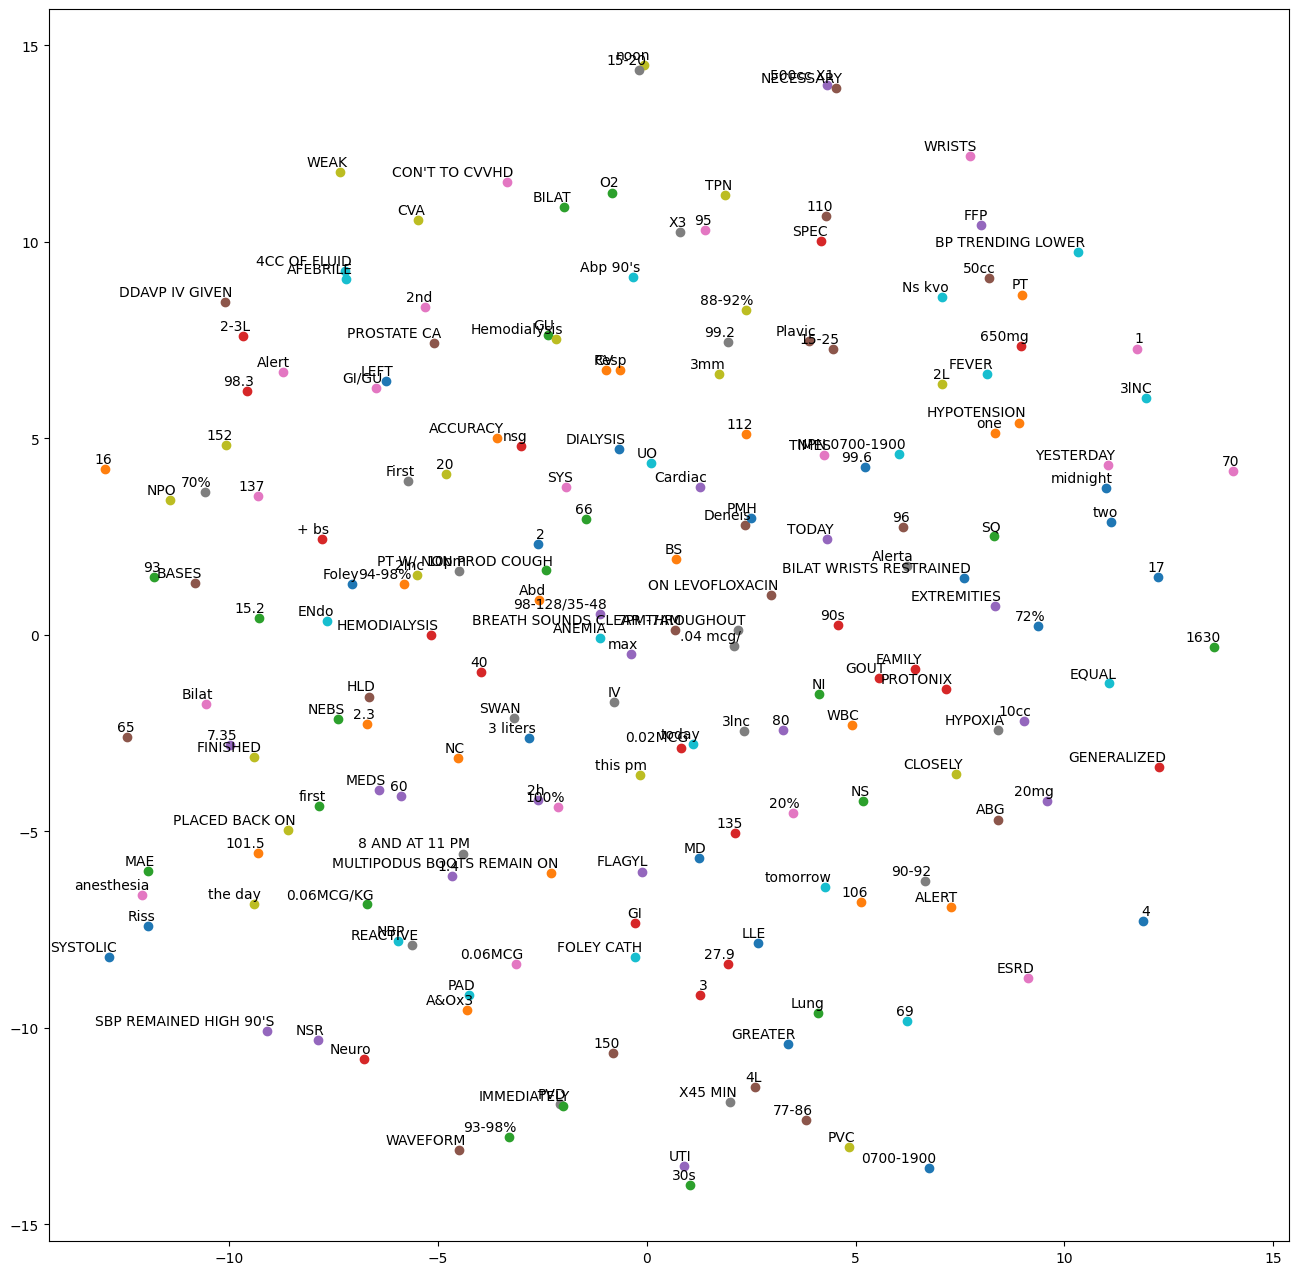

In [ ]:
vocabs = model.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model,new_v)

In [ ]:
import gensim
import gensim.downloader as api

info = api.info()
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
pretrained_model.most_similar("cough")

[('colds', 0.8054866194725037),
 ('coughing', 0.7683624625205994),
 ('allergies', 0.757732093334198),
 ('wheezing', 0.7530959844589233),
 ('shortness', 0.7494330406188965),
 ('coughs', 0.7409442663192749),
 ('fever', 0.7321828007698059),
 ('aches', 0.7282669544219971),
 ('sneeze', 0.7264149188995361),
 ('syrups', 0.7256797552108765)]

In [ ]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

NC
GU
GI
NSR
REACTIVE
NPO
AFEBRILE
MD
CV
O2
Neuro
IV
this pm
NBP
Foley
Cardiac
TIMES
70%
TPN
DIALYSIS
ALERT
BILAT
650mg
98-128/35-48
4L
WRISTS
X3
the day
NPN 0700-1900
GREATER
NS
500cc X1
77-86
PVC
Resp
93-98%
2-3L
Bilat
BP TRENDING LOWER
0700-1900
NI
FAMILY
NECESSARY
CON'T TO CVVHD
SWAN
Hemodialysis
PAD
WBC
PT W/ NON PROD COUGH
SPEC
UTI
ON LEVOFLOXACIN
Alerta
Ns kvo
Riss
Abd
+ bs
SBP REMAINED HIGH 90'S
Plavic
20%
.04 mcg/
Abp 90's
3 liters
94-98%
Lung
Deneis
GI/GU
HYPOXIA
WEAK
FEVER
SQ
ABG
100%
3lnc
88-92%
3lNC
72%
BS
20mg
Alert
First
CLOSELY
ENdo
MAE
2lnc
A&Ox3
NEBS
PROTONIX
FLAGYL
HLD
SYS
8 AND AT 11 PM
UO
LEFT
MULTIPODUS BOOTS REMAIN ON
0.02MCG
WAVEFORM
0.06MCG
BREATH SOUNDS CLEAR THROUGHOUT
2L
EQUAL
BILAT WRISTS RESTRAINED
ACCURACY
0.06MCG/KG
GOUT
EXTREMITIES
PROSTATE CA
ESRD
PVD
CVA
ANEMIA
PMH
HYPOTENSION
GENERALIZED
MEDS
BASES
90-92
PLACED BACK ON
FOLEY CATH
LLE
FFP
DDAVP IV GIVEN
YESTERDAY
X45 MIN
FINISHED
4CC OF FLUID
SYSTOLIC
PT
IMMEDIATELY
HEMODIALYSIS
TODAY
7PM-7AM


In [ ]:
print(corpus_in_pretrained_model)

['2', '110', '95', '80', '65', '70', 'one', 'first', '3', '96', 'today', '112', '135', '137', '99.2', 'tomorrow', '4', '10cc', '15-25', '10pm', '152', '106', '1.4', '17', 'anesthesia', 'noon', '1630', '3mm', '98.3', 'max', '99.6', '101.5', '40', '7.35', '30s', '90s', '150', 'midnight', '16', 'nsg', '2h', '50cc', '2nd', '15-20', '69', 'two', '20', '66', '60', '93', '1', '2.3', '15.2', '27.9']


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


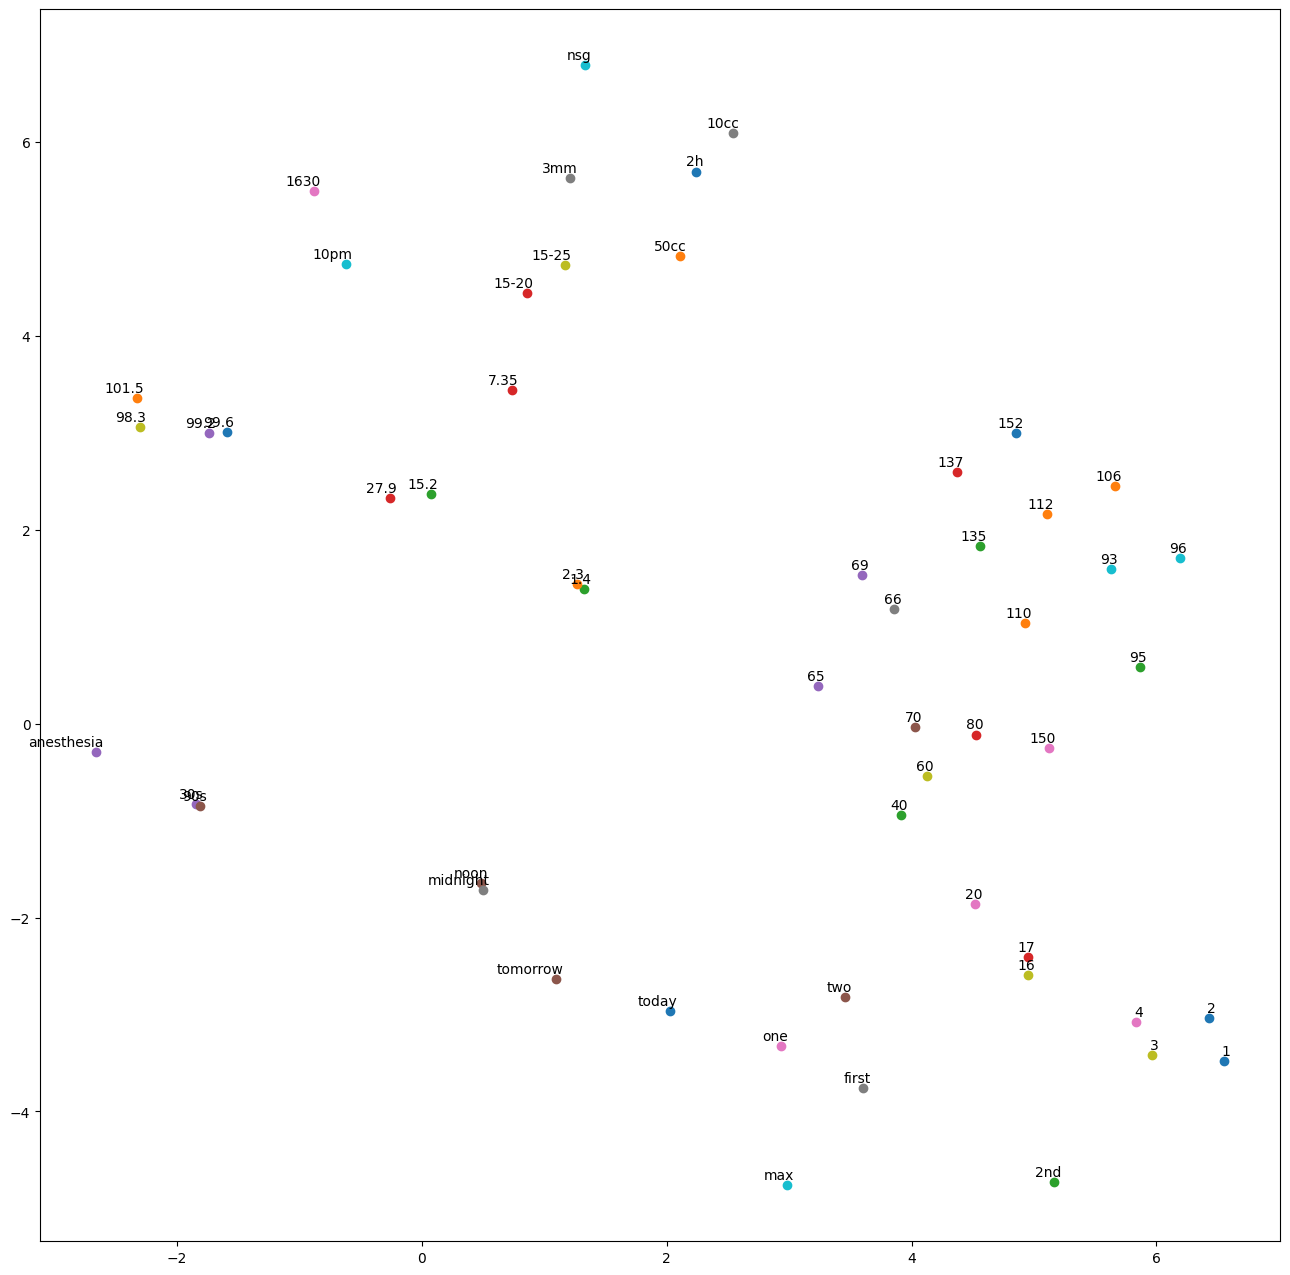

In [ ]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

In [ ]:
!pip install scispacy

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

In [ ]:
import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
df1 = sample_texts

In [ ]:
corpus1 = []
for row in range(0, len(df1)):
  str_tokens=[]
  tokens=nlp(df1[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus1.append(str_tokens)

print(corpus1)

[['7PM-7AM', 'UTI', 'K', 'PAD LOW 20S, UNABLE', 'CVVHD', 'ARM', 'PALP', 'PALP'], ['confusion', 'speach', 'O2 saturation 94-98', 'cough', 'ectopy', "d/c'd", 'GI/GU', 'watery', 'Pt', 'liver abcess', 'eschar', 'bruises'], ['Lethargic', 'pain', 'tylenol', 'levophed', '.05mcg/kg/min', 'NSR', 'O2 sat 93-98% on 2-3L O2 via NC;', 'cough of white sputum', 'dry mouth', 'flagyl', 'vanco', 'FSBG', 'fluid/electrolyte', 'FSBG'], ['WRISTS RESTRAINED D/T PLACEMENT OF GROIN', 'NO', 'NO', 'NSR', 'REMAINED', 'ALL', 'NO', 'NO', 'BE'], ['HE WAS', 'HTN', 'CVA', 'PVD', 'ESRD', 'REMAINED', 'LEVOPHED WAS', 'WAS', '20MMHG', 'BE', 'HAD', 'CAN', 'BE', 'WRISTS', 'ALL', 'NO', 'SOB', 'NO', 'NSR', 'NO', 'BE'], ['DROPPED', 'LEVOPHED TITRATED UP', 'HE WAS', 'WAS', 'DDAVP', 'NO', 'HAD', 'LLE', 'ALL', 'HE FELL', 'DROPPED', 'NO', 'NO', 'SOB', 'NSR', 'LEVOPHED BACK DOWN', 'ALL', 'DUODERM', 'Name8', 'NamePattern1'], ['pain', 'tylenol', 'throat pain', '3lNC', 'lasix', 'heparin', 'tylenol', 'flagyl', 'SSRI', 'sao2', 'pain'], 

In [ ]:
import gensim

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [ ]:
corpus2=[]
for row in range(0, len(df1)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus2.append(list(str_tokens))


print(corpus2)

[['7PM-7AM', 'UTI', 'K', 'PAD LOW 20S, UNABLE', 'CVVHD', 'ARM', 'PALP', 'PALP'], ['confusion', 'speach', 'O2 saturation 94-98', 'cough', 'ectopy', "d/c'd", 'GI/GU', 'watery', 'Pt', 'liver abcess', 'eschar', 'bruises'], ['Lethargic', 'pain', 'tylenol', 'levophed', '.05mcg/kg/min', 'NSR', 'O2 sat 93-98% on 2-3L O2 via NC;', 'cough of white sputum', 'dry mouth', 'flagyl', 'vanco', 'FSBG', 'fluid/electrolyte', 'FSBG'], ['WRISTS RESTRAINED D/T PLACEMENT OF GROIN', 'NO', 'NO', 'NSR', 'REMAINED', 'ALL', 'NO', 'NO', 'BE'], ['HE WAS', 'HTN', 'CVA', 'PVD', 'ESRD', 'REMAINED', 'LEVOPHED WAS', 'WAS', '20MMHG', 'BE', 'HAD', 'CAN', 'BE', 'WRISTS', 'ALL', 'NO', 'SOB', 'NO', 'NSR', 'NO', 'BE'], ['DROPPED', 'LEVOPHED TITRATED UP', 'HE WAS', 'WAS', 'DDAVP', 'NO', 'HAD', 'LLE', 'ALL', 'HE FELL', 'DROPPED', 'NO', 'NO', 'SOB', 'NSR', 'LEVOPHED BACK DOWN', 'ALL', 'DUODERM', 'Name8', 'NamePattern1'], ['pain', 'tylenol', 'throat pain', '3lNC', 'lasix', 'heparin', 'tylenol', 'flagyl', 'SSRI', 'sao2', 'pain'], 

In [ ]:
!pip install gensim

In [ ]:
df1 = sample_texts

In [ ]:
model2 = word2vec.Word2Vec(corpus2, min_count=1)

In [ ]:
model2.wv.similar_by_word('cough')

[('BE', 0.3039127290248871),
 ('0700-1900', 0.22290340065956116),
 ('NO', 0.19592593610286713),
 ('lasix', 0.19459645450115204),
 ('O2', 0.1873902827501297),
 ('liver abcess', 0.1859346330165863),
 ('98-128/35-48', 0.18199166655540466),
 ('90s', 0.17564739286899567),
 ('YESTERDAY', 0.17129281163215637),
 ('NBP', 0.16761410236358643)]

In [ ]:
model2.wv['neuro']

KeyError: "Key 'neuro' not present"

In [ ]:
def tsne_plot1(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


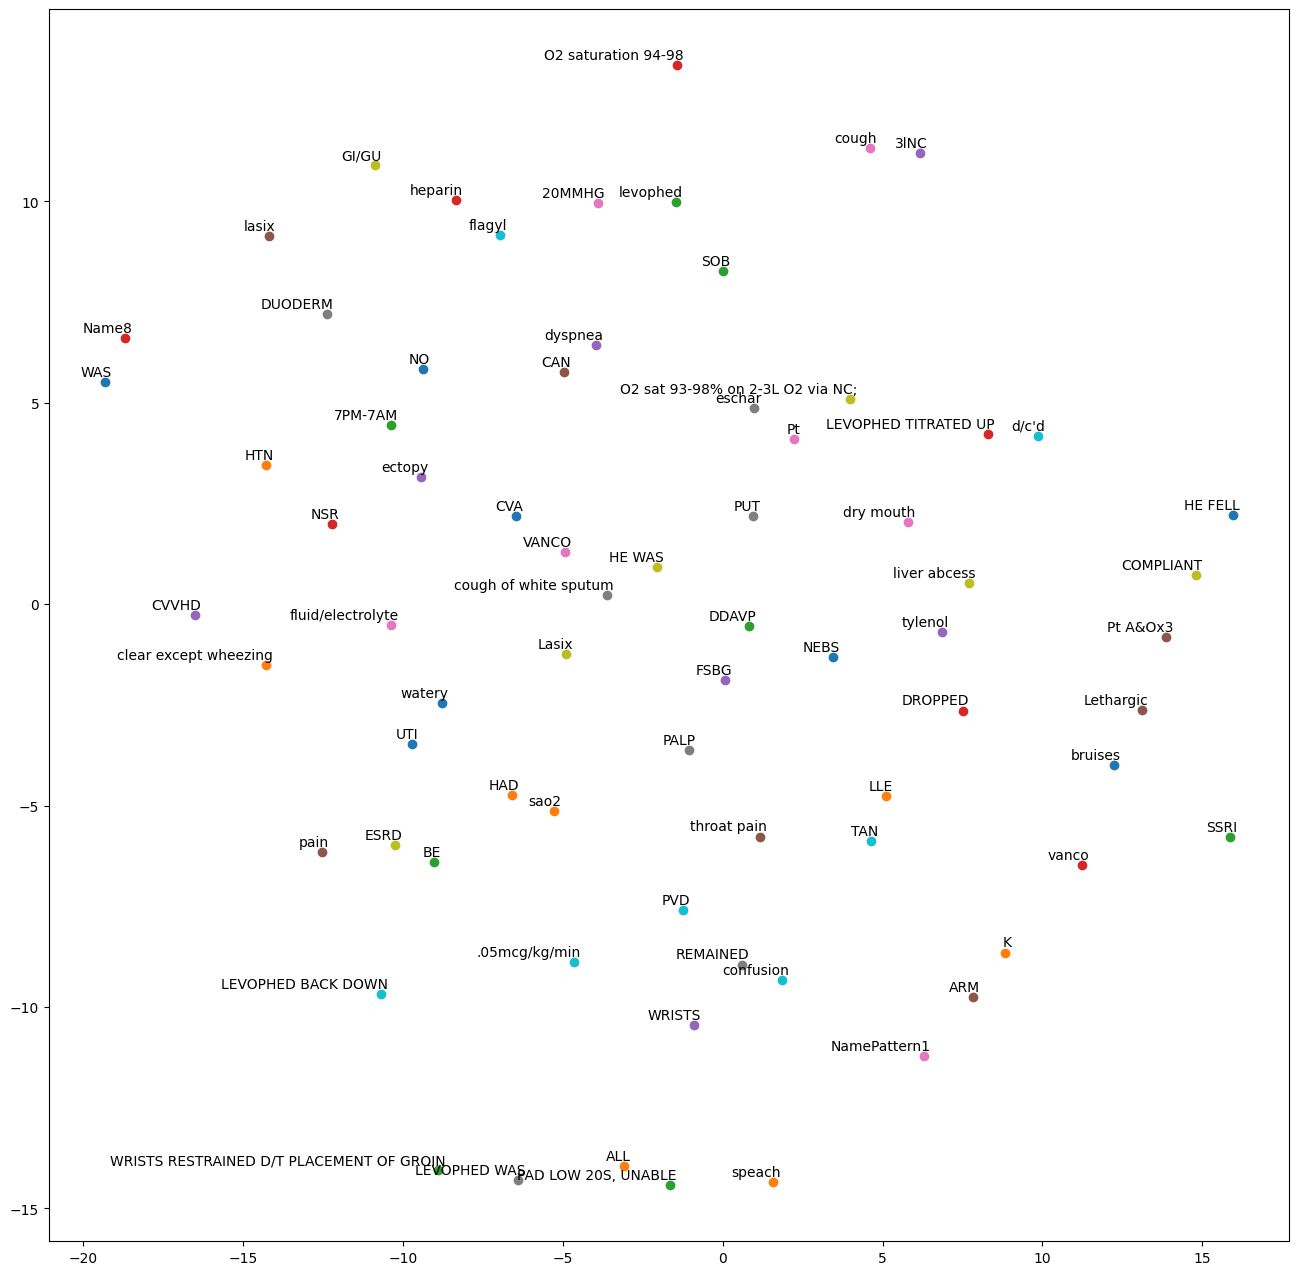

In [ ]:
vocabs = model2.wv.index_to_key  # Access vocabulary using index_to_key
new_v = np.array(list(vocabs))
tsne_plot1(model2, new_v)

